# 국내 승강기 보유 현황

```
한국승강기안전공단 국내 승강기 보유 현황

한국승강기안전공단에서는 승강기 관련 종합정보전산망을 구축하여 승강기에 대한 종합정보와 사고 등의 각종 이력관리 및 승강기관련 각종 통계자료를 제공하고 있습니다.

https://www.data.go.kr/data/15017366/fileData.do
```

# 1. Data 확인

In [1]:
import pandas as pd

## Load Data

In [2]:
url = "https://raw.githubusercontent.com/sw1kwon/KESA/refs/heads/main/data/c_02.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
0,강원 강릉시,#초당,4,4.0,승객용,제1종근린생활시설,1.00,1
1,강원 강릉시,(사)강릉중앙시장번영회,2,8.6,경사형휠체어리프트,제2종근린생활시설,0.13,1
2,강원 강릉시,(주)강릉농산물도매시장,2,3.0,화물용,판매시설,0.75,1
3,강원 강릉시,(주)강릉농산물도매시장,3,3.0,화물용,판매시설,0.75,1
4,강원 강릉시,(주)경포아쿠아리움,2,2.0,병원용,문화및집회시설,1.00,1


## 데이터 구조 확인

In [4]:
df.shape

(540622, 8)

In [5]:
# 데이터 구조 파악
# object 문자형
# int/float 수치형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540622 entries, 0 to 540621
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   지역              540622 non-null  object 
 1   건물명             540622 non-null  object 
 2   건물층수            540622 non-null  int64  
 3   운행층수            540622 non-null  float64
 4   승강기종류           540622 non-null  object 
 5   건물용도(대)         540622 non-null  object 
 6   정격속도(미터 퍼 세컨드)  540601 non-null  float64
 7   대수              540622 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 33.0+ MB


- 정격속도(미터 퍼 세컨드)를 제외한 모든 변수에 Null 값이 없음

In [6]:
# 문자형(범주형) 데이터 확인
df.describe(include=['object']).T

,count,unique,top,freq
지역,540622,252,서울 강남구,13350
건물명,540622,265772,대성빌딩,314
승강기종류,540622,35,승객용,212427
건물용도(대),540622,31,공동주택,176317


In [7]:
# 수치형 데이터 확인
df.describe(include=['int64','float64'])

,건물층수,운행층수,정격속도(미터 퍼 세컨드),대수
count,540622.000000,540622.000000,540601.000000,540622.000000
mean,7.763321,8.102380,1.133568,1.602769
std,7.153593,7.127733,0.473054,2.188103
min,0.000000,0.000000,0.003500,1.000000
25%,4.000000,4.000000,1.000000,1.000000
50%,5.000000,5.000000,1.000000,1.000000
75%,9.000000,10.000000,1.500000,1.000000
max,340.000000,128.000000,30.000000,142.000000


In [8]:
# df.describe(include='number') # 동일 결과 코드

# 2. EDA

## 1. (결측치) 각 column의 결측값 비율

In [9]:
# 각 column의 결측값 비율 계산
missing_ratio = df.isnull().mean()                  # 각 column의 결측값 비율 계산 (결측 개수 / 전체 row 수)
missing_ratio = missing_ratio.sort_values(ascending=False)  # 결측 비율이 높은 순서대로 정렬
missing_ratio = missing_ratio.reset_index()         # Series → DataFrame 변환 (인덱스 초기화)
missing_ratio.columns = ['Column', 'MissingRatio']
print(missing_ratio)

           Column  MissingRatio
0  정격속도(미터 퍼 세컨드)      0.000039
1              지역      0.000000
2            건물층수      0.000000
3             건물명      0.000000
4            운행층수      0.000000
5           승강기종류      0.000000
6         건물용도(대)      0.000000
7              대수      0.000000


- 정격속도(미터 퍼 세컨드)만 결측값이 존재하고 결측 비율도 낮음

## 2. (이상치) 각 column별 이상치 확인

In [10]:
# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 이상치 비율 저장용 리스트
outlier_info = []

# 각 수치형 column에 대해 이상치 비율 계산 (IQR 방식)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_ratio = outliers / df.shape[0]
    outlier_info.append((col, outliers, outlier_ratio))

# 결과 DataFrame 정리
outlier_df = pd.DataFrame(outlier_info, columns=['Column', 'OutlierCount', 'OutlierRatio'])
outlier_df = outlier_df.sort_values(by='OutlierRatio', ascending=False)

print(outlier_df)

           Column  OutlierCount  OutlierRatio
3              대수        119623      0.221269
0            건물층수         61067      0.112957
1            운행층수         47398      0.087673
2  정격속도(미터 퍼 세컨드)         15887      0.029387


- 모든 수치형 변수에 IQR 방식의 이상치가 존재

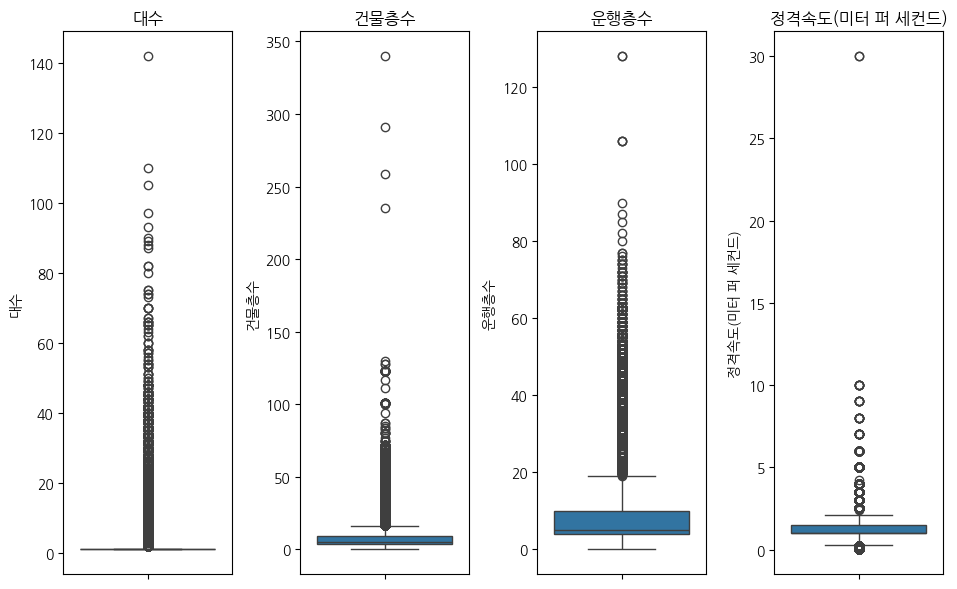

In [11]:
# 이상치 비율이 높은 상위 n개 변수만 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치 비율 높은 상위 n개 변수만 선택
top_n = 5
top_outlier_cols = outlier_df.head(top_n)['Column']

# 박스플롯 시각화
plt.figure(figsize=(12, 6))
for i, col in enumerate(top_outlier_cols, 1):
    plt.subplot(1, top_n, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

- 각 변수마다 이상치 중에서도 돋보이는 이상치들이 보임

In [12]:
# # 개별 탐색 시 사용 가능한 함수 정의
# def plot_box(col):
#     sns.boxplot(y=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.show()

# # 예시 사용: plot_box('Column Name')

### 이상치가 있는 row 확인

In [13]:
df[df['대수'] > 100]

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
258740,대전 유성구,엑스포아파트,17,17.0,승객용,공동주택,1.5,110
383409,서울 송파구,올림픽훼밀리타운,15,15.0,승객용,공동주택,1.0,142
493174,제주 제주시,라온프라이빗타운,7,7.0,장애인용,공동주택,1.0,105


In [14]:
df[df['건물층수'] > 200]

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
264301,부산 강서구,명지2차 금강펜테리움 센트럴파크,259,30.0,소방구조/장애인용,공동주택,1.75,1
264302,부산 강서구,명지2차 금강펜테리움 센트럴파크,291,30.0,소방구조/장애인용,공동주택,1.75,1
283688,부산 사상구,주례반도보라매머드타운,235,23.0,소방구조용,공동주택,1.50,1
452506,인천 연수구,랜드마크시티센트럴더샵업무시설,340,43.0,피난/장애용,공동주택,3.00,1


- 이 경우 승강기 종류가 승객용이 아님

In [15]:
df[df['운행층수'].isin(df['운행층수'].nlargest(7))].sort_values(by='운행층수', ascending=False)

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
380493,서울 송파구,롯데월드타워 물산,123,128.0,소방구조용,업무시설,8.0,1
380492,서울 송파구,롯데월드타워 물산,123,128.0,소방구조용,업무시설,6.0,1
294853,부산 해운대구,"LCT( 포디움,전망대 )",101,106.0,소방구조용,제1종근린생활시설,4.0,1
380491,서울 송파구,롯데월드타워 물산,123,106.0,피난용,업무시설,8.0,1
294883,부산 해운대구,LCT(더 레지던스),101,106.0,소방구조용,제1종근린생활시설,4.0,1
294896,부산 해운대구,LCT(주거동),85,90.0,소방구조용,제1종근린생활시설,4.0,2
297711,부산 해운대구,해운대두산위브더제니스,82,87.0,소방구조/장애인용,공동주택,3.5,1


- 이 경우도 승강기 종류가 승객용이 아님

In [16]:
df[df['정격속도(미터 퍼 세컨드)'] > 15]

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
5028,강원 속초시,카시아속초생활형숙박시설,5,2.0,에스컬레이터,숙박시설,30.0,2
6937,강원 원주시,드림시티,6,0.0,에스컬레이터,교육연구시설,30.0,2


- 조건을 만족하는 row가 2개였음
- 승강기 종류는 모두 에스컬레이터

## 3. (unique) 각 column의 unique값과 unique값별 빈도

In [17]:
# # 전체 column 대상 (비율을 %로, 순서 유지)

# for col in df.columns:
#     print(f"=== {col} ===")
#     print("Unique count:", df[col].nunique())

#     # 빈도와 비율 계산 (NaN 포함, 고유값 순서 유지)
#     value_counts = df[col].value_counts(dropna=False, sort=False)
#     value_ratio = df[col].value_counts(normalize=True, dropna=False, sort=False) * 100  # 비율을 %

#     # 결합
#     summary_df = pd.DataFrame({
#         'Count': value_counts,
#         'Ratio (%)': value_ratio.round(2)
#     })

#     print(summary_df)
#     print("\n")

In [18]:
# 범주형 변수만 대상
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"=== {col} ===")
    print("Unique count:", df[col].nunique())

    value_counts = df[col].value_counts(dropna=False, sort=False)
    value_ratio = df[col].value_counts(normalize=True, dropna=False, sort=False) * 100

    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Ratio (%)': value_ratio.round(2)
    })

    print(summary_df)
    print("\n")

=== 지역 ===
Unique count: 252
            Count  Ratio (%)
지역                          
강원 강릉시       2378       0.44
강원 고성군        296       0.05
강원 동해시        788       0.15
강원 삼척시        651       0.12
강원 속초시       1050       0.19
...           ...        ...
충북 청주시 상당구   1917       0.35
충북 청주시 서원구   1705       0.32
충북 청주시 청원구   2198       0.41
충북 청주시 흥덕구   3869       0.72
충북 충주시       2333       0.43

[252 rows x 2 columns]


=== 건물명 ===
Unique count: 265772
              Count  Ratio (%)
건물명                           
#초당               1        0.0
(사)강릉중앙시장번영회      1        0.0
(주)강릉농산물도매시장      2        0.0
(주)경포아쿠아리움        2        0.0
(주)대성환경건설         1        0.0
...             ...        ...
홀인원리조트            1        0.0
화정빌딩A             1        0.0
환이빌딩              1        0.0
환호빌리지             1        0.0
휴먼시아7단지아파트        3        0.0

[265772 rows x 2 columns]


=== 승강기종류 ===
Unique count: 35
               Count  Ratio (%)
승강기종류                          
승객용     

- 승강기의 종류는 승객용과 장애인용이 대부분

### 비율이 높은 지역 확인

In [19]:
def summarize_category(df, column, top_n=None, include_na=True):
    """
    범주형 변수 요약 (건수 + 비율)
    
    Parameters:
    - df: DataFrame
    - column: 분석할 열 이름 (문자열)
    - top_n: 상위 n개만 출력 (None이면 전체)
    - include_na: NaN 포함 여부
    
    Returns:
    - summary DataFrame
    """
    counts = df[column].value_counts(dropna=include_na)
    ratios = df[column].value_counts(normalize=True, dropna=include_na).mul(100).round(2)

    summary = pd.DataFrame({
        '건수': counts,
        '비율(%)': ratios
    }).reset_index().rename(columns={'index': column})

    if top_n is not None:
        summary = summary.head(top_n)

    return summary

In [20]:
summarize_category(df, '지역', top_n=10) # 지역의 NaN은 없음

,지역,건수,비율(%)
0,서울 강남구,13350,2.47
1,경기 화성시,11069,2.05
2,경기 평택시,9805,1.81
3,서울 서초구,8127,1.50
4,제주 제주시,7314,1.35
5,서울 송파구,7002,1.30
6,서울 강서구,6482,1.20
7,경기 남양주시,6324,1.17
8,인천 서구,5811,1.07
9,대전 유성구,5700,1.05


- 추후 활용 가능성..

## 4. (기술통계) 각 column의 기술통계 (평균값, 최대값, 최솟값, 최빈값, 분위수 등)

In [21]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 통계 요약 저장용 리스트
stat_list = []

for col in numeric_cols:
    desc = df[col].describe()
    mode = df[col].mode(dropna=False).values[0]  # 최빈값 (여러 개 중 첫 번째 선택)
    mode_all = df[col].mode(dropna=False).tolist()  # 최빈값 리스트 형태로 저장

    stat_list.append({
        'Feature': col,
        'Count': desc['count'],
        'Mean': desc['mean'],
        'Std': desc['std'],
        'Min': desc['min'],
        '25%': desc['25%'],
        'Median (50%)': desc['50%'],
        '75%': desc['75%'],
        'Max': desc['max'],
        'Mode': mode,
        'Mode_all': mode_all
    })

# DataFrame으로 정리
stats_df = pd.DataFrame(stat_list)
stats_df

,Feature,Count,Mean,Std,Min,25%,Median (50%),75%,Max,Mode,Mode_all
0,건물층수,540622.0,7.763321,7.153593,0.0000,4.0,5.0,9.0,340.0,4.0,[4]
1,운행층수,540622.0,8.102380,7.127733,0.0000,4.0,5.0,10.0,128.0,4.0,[4.0]
2,정격속도(미터 퍼 세컨드),540601.0,1.133568,0.473054,0.0035,1.0,1.0,1.5,30.0,1.0,[1.0]
3,대수,540622.0,1.602769,2.188103,1.0000,1.0,1.0,1.0,142.0,1.0,[1]


## 5. (상관관계) 상관관계 매트릭스

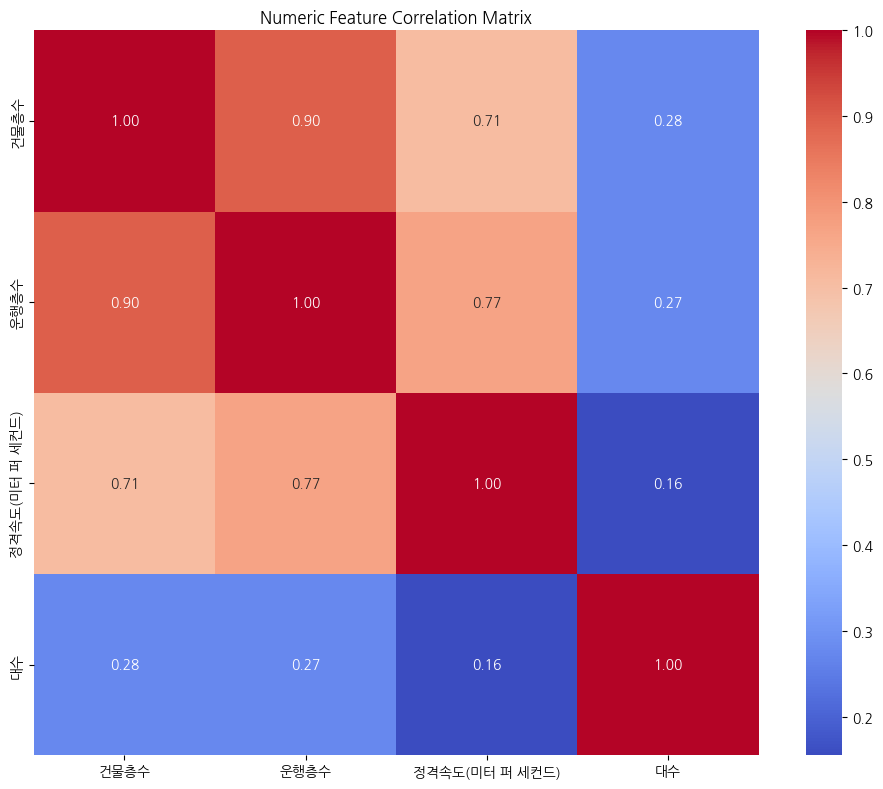

In [22]:
# 수치형 변수 간 상관관계 매트릭스

import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr_matrix = numeric_df.corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Numeric Feature Correlation Matrix")
plt.tight_layout()
plt.show()

- 전부 양의 상관관계를 보임
- 대수는 다른 변수들과 상관관계가 약한 편

## 6. (시각화) histogram, bar graph, box plot 등

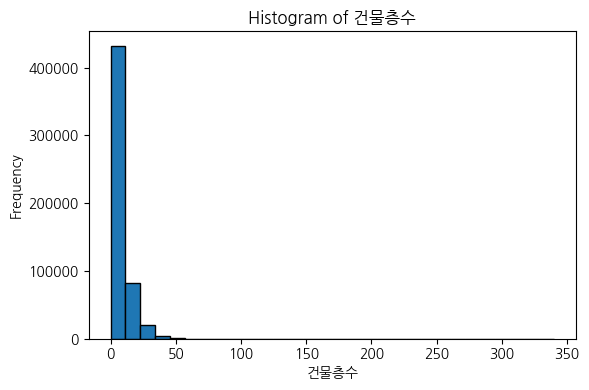

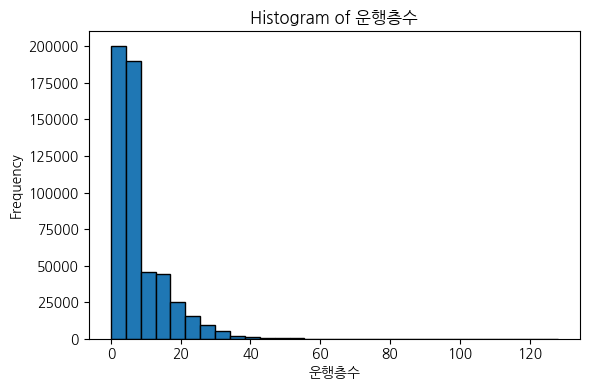

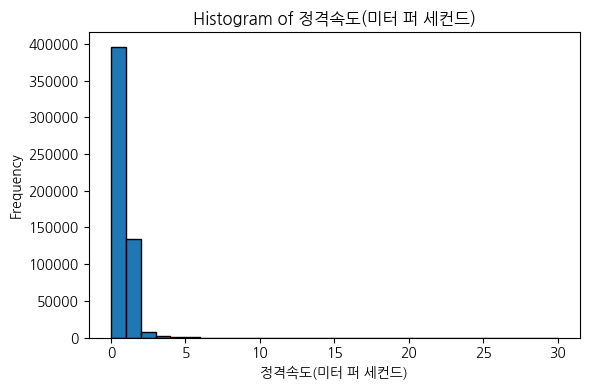

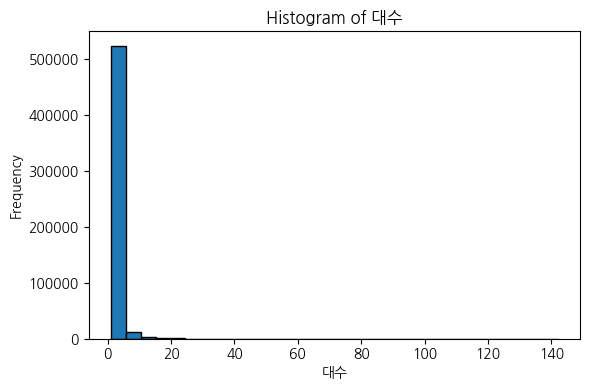

In [23]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 전체 수치형 변수에 대해 히스토그램 그리기
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

- bins를 증가시키면

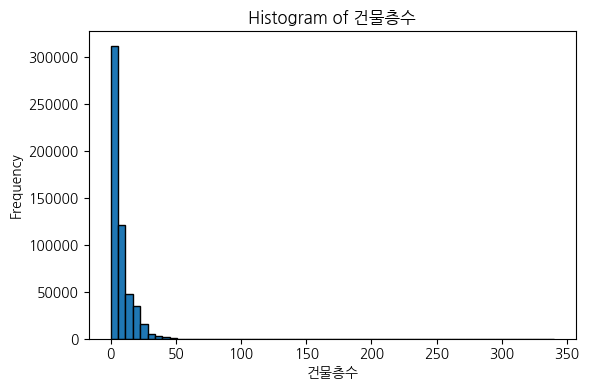

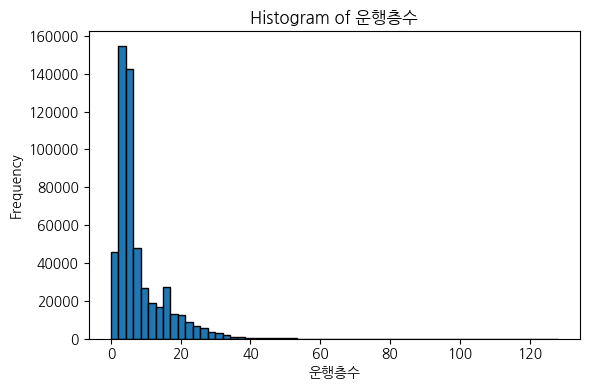

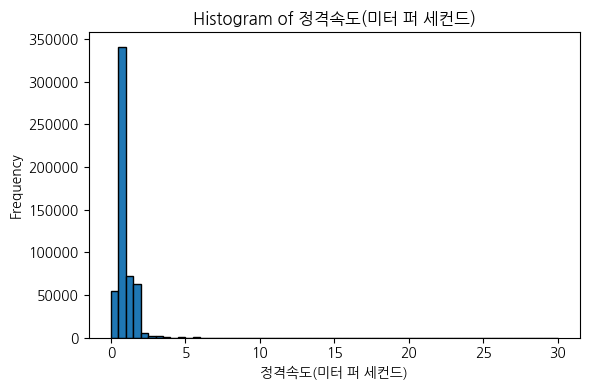

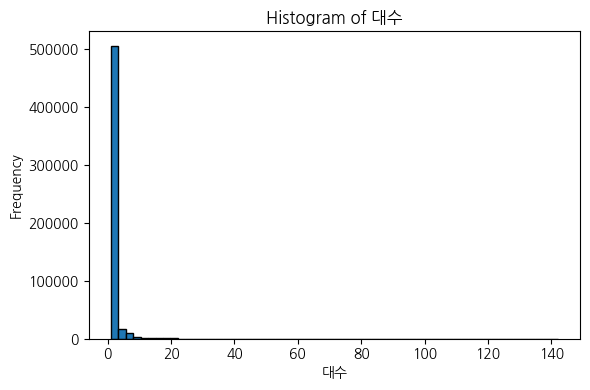

In [24]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 전체 수치형 변수에 대해 히스토그램 그리기
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=60, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# cat_cols = df.select_dtypes(include=['object']).columns

# # 전체 범주형 변수에 대해 히스토그램 그리기

# for col in cat_cols:
#     plt.figure(figsize=(6, 4))
#     ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, color='salmon')

#     total = len(df)

#     for p in ax.patches:
#         count = int(p.get_height())
#         percent = 100 * count / total
#         label = f'{count} ({percent:.1f}%)'

#         # 텍스트 위치: 막대 안쪽 상단 (중앙 정렬)
#         ax.annotate(label,
#                     (p.get_x() + p.get_width() / 2., p.get_height() * 0.95),
#                     ha='center', va='top',
#                     fontsize=9, color='white', weight='bold')

#     plt.title(f'Bar Graph of {col} (Count + Ratio)')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

- 의미가 없어서 실행 X (시간도 오래 걸림)

In [26]:
# # 특정 변수에 따른 수치형 변수 분포 비교
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(data=df, x='###Column Name###', y=col)
#     plt.title(f'Boxplot of {col} by ###Column Name###')
#     plt.tight_layout()
#     plt.show()

- 의미가 없어서 실행 X

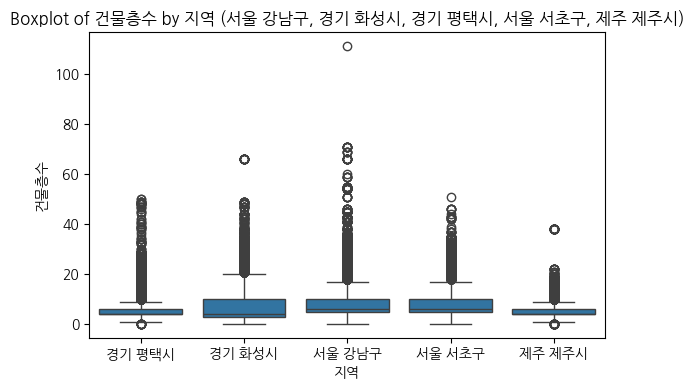

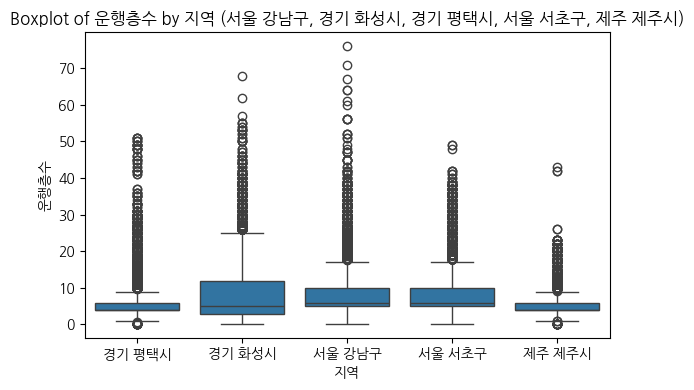

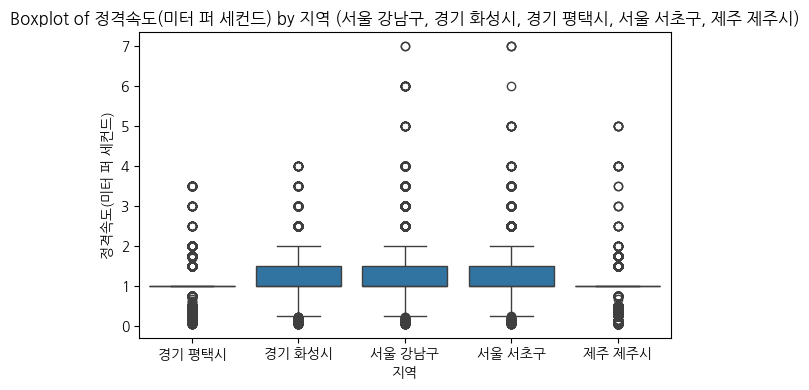

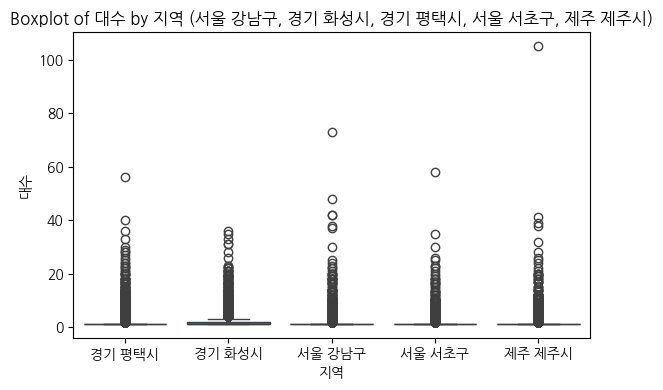

In [27]:
# 특정 변수 중 특정 값들에 따른 수치형 변수들 분포 비교
import seaborn as sns
import matplotlib.pyplot as plt

# 파라미터 설정
group_col = '지역'  # 비교할 범주형 변수
target_values = ['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시']  # 특정 값들
numeric_cols = ['건물층수', '운행층수', '정격속도(미터 퍼 세컨드)', '대수']  # 수치형 변수 목록

# 필터링된 데이터프레임
filtered_df = df[df[group_col].isin(target_values)]

# 반복해서 boxplot 그리기
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=filtered_df, x=group_col, y=col)
    plt.title(f'Boxplot of {col} by {group_col} ({", ".join(target_values)})')
    plt.tight_layout()
    plt.show()

## 7. (교차표) 범주형 변수 간의 관계

In [33]:
# '지역'에 따른 '승강기종류' 비율
print("=== 지역 vs 승강기종류 ===")
ratio = df.groupby('지역')['승강기종류'].value_counts(normalize=True).unstack()
ratio.head()

=== 지역 vs 승강기종류 ===


승강기종류,경사형휠체어리프트,덤웨이터,무빙워크,병원용,소방구조/병원용,소방구조/승객화물용,소방구조/장애/병원용,소방구조/장애/승객화물,소방구조/장애/전망용,소방구조/장애인용,...,전망용,주택엘리베이터,피난/승객화물용,피난/장애/병원용,피난/장애/승객화물용,피난/장애용,피난용,화물/자동차용,화물용,화물용(DW)
지역,,,,,,,,,,,,,,,,,,,,,
강원 강릉시,0.003364,0.010513,0.004205,0.013877,0.000421,0.000421,NaN,0.002103,NaN,0.065601,...,0.014718,0.013457,NaN,NaN,NaN,NaN,NaN,0.000421,0.029016,0.003364
강원 고성군,0.003378,0.020270,0.003378,0.010135,NaN,NaN,NaN,0.010135,NaN,0.064189,...,0.050676,0.003378,NaN,NaN,NaN,NaN,NaN,NaN,0.030405,NaN
강원 동해시,0.001269,0.013959,0.006345,0.020305,NaN,NaN,NaN,0.002538,NaN,0.144670,...,0.019036,NaN,NaN,NaN,NaN,NaN,0.001269,NaN,0.032995,0.002538
강원 삼척시,0.006144,0.019969,0.006144,0.006144,NaN,NaN,NaN,NaN,NaN,0.099846,...,0.021505,0.001536,NaN,NaN,NaN,NaN,NaN,NaN,0.015361,NaN
강원 속초시,NaN,0.012381,0.004762,0.012381,NaN,0.001905,NaN,NaN,NaN,0.110476,...,0.030476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011429,0.000952


In [30]:
# pd.crosstab(df['지역'], df['승강기종류'], normalize='index')

### 함수 1

In [31]:
def grouped_ratio_table(df, group_col, target_col, normalize=True):
    """
    group_col 기준으로 target_col의 비율(또는 건수)을 cross-tab 형태로 반환

    Parameters:
    - df: DataFrame
    - group_col: 그룹 기준 변수 (ex: '지역')
    - target_col: 비율을 계산할 대상 변수 (ex: '승강기종류')
    - normalize: True면 비율, False면 건수

    Returns:
    - DataFrame: 행 = group_col, 열 = target_col
    """
    grouped = (
        df.groupby(group_col)[target_col]
        .value_counts(normalize=normalize)
        .unstack()
    )
    return grouped

In [39]:
# 비율 사용 예시
print("=== 지역 vs 승강기종류 비율 ===")
grouped_ratio_table(df, '지역', '승강기종류').head()

=== 지역 vs 승강기종류 비율 ===


승강기종류,경사형휠체어리프트,덤웨이터,무빙워크,병원용,소방구조/병원용,소방구조/승객화물용,소방구조/장애/병원용,소방구조/장애/승객화물,소방구조/장애/전망용,소방구조/장애인용,...,전망용,주택엘리베이터,피난/승객화물용,피난/장애/병원용,피난/장애/승객화물용,피난/장애용,피난용,화물/자동차용,화물용,화물용(DW)
지역,,,,,,,,,,,,,,,,,,,,,
강원 강릉시,0.003364,0.010513,0.004205,0.013877,0.000421,0.000421,NaN,0.002103,NaN,0.065601,...,0.014718,0.013457,NaN,NaN,NaN,NaN,NaN,0.000421,0.029016,0.003364
강원 고성군,0.003378,0.020270,0.003378,0.010135,NaN,NaN,NaN,0.010135,NaN,0.064189,...,0.050676,0.003378,NaN,NaN,NaN,NaN,NaN,NaN,0.030405,NaN
강원 동해시,0.001269,0.013959,0.006345,0.020305,NaN,NaN,NaN,0.002538,NaN,0.144670,...,0.019036,NaN,NaN,NaN,NaN,NaN,0.001269,NaN,0.032995,0.002538
강원 삼척시,0.006144,0.019969,0.006144,0.006144,NaN,NaN,NaN,NaN,NaN,0.099846,...,0.021505,0.001536,NaN,NaN,NaN,NaN,NaN,NaN,0.015361,NaN
강원 속초시,NaN,0.012381,0.004762,0.012381,NaN,0.001905,NaN,NaN,NaN,0.110476,...,0.030476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011429,0.000952


In [40]:
# 건수 사용 예시
print("=== 지역 vs 승강기종류 건수 ===")
grouped_ratio_table(df, '지역', '승강기종류', normalize=False).head()

=== 지역 vs 승강기종류 건수 ===


승강기종류,경사형휠체어리프트,덤웨이터,무빙워크,병원용,소방구조/병원용,소방구조/승객화물용,소방구조/장애/병원용,소방구조/장애/승객화물,소방구조/장애/전망용,소방구조/장애인용,...,전망용,주택엘리베이터,피난/승객화물용,피난/장애/병원용,피난/장애/승객화물용,피난/장애용,피난용,화물/자동차용,화물용,화물용(DW)
지역,,,,,,,,,,,,,,,,,,,,,
강원 강릉시,8.0,25.0,10.0,33.0,1.0,1.0,NaN,5.0,NaN,156.0,...,35.0,32.0,NaN,NaN,NaN,NaN,NaN,1.0,69.0,8.0
강원 고성군,1.0,6.0,1.0,3.0,NaN,NaN,NaN,3.0,NaN,19.0,...,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
강원 동해시,1.0,11.0,5.0,16.0,NaN,NaN,NaN,2.0,NaN,114.0,...,15.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.0,2.0
강원 삼척시,4.0,13.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,65.0,...,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
강원 속초시,NaN,13.0,5.0,13.0,NaN,2.0,NaN,NaN,NaN,116.0,...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0


### 함수 2

In [36]:
def filter_crosstab(df, group_col, target_col,
                    row_values=None, col_values=None,
                    normalize=True):
    """
    전체 교차표 생성 후, 특정 행(row)/열(column)만 필터링
    
    Parameters:
    - df: 전체 DataFrame
    - group_col: 행 기준 (예: '지역')
    - target_col: 열 기준 (예: '승강기종류')
    - row_values: group_col 중 보고 싶은 값 리스트
    - col_values: target_col 중 보고 싶은 값 리스트
    - normalize: True면 비율, False면 건수
    
    Returns:
    - 필터된 교차표 DataFrame
    """
    table = df.groupby(group_col)[target_col].value_counts(normalize=normalize).unstack()

    if row_values is not None:
        table = table.loc[table.index.intersection(row_values)]
    if col_values is not None:
        table = table.loc[:, table.columns.intersection(col_values)]
        
    return table

In [38]:
# 비율 사용 예시
filter_crosstab(df,
                group_col='지역',
                target_col='승강기종류',
                row_values=['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
                col_values=['승객용', '장애인용'],
                normalize=True)

승강기종류,승객용,장애인용
지역,,
경기 평택시,0.489138,0.265783
경기 화성시,0.322071,0.282320
서울 강남구,0.467715,0.255955
서울 서초구,0.457364,0.260859
제주 제주시,0.427400,0.421247


In [41]:
# 건수 사용 예시
filter_crosstab(df,
                group_col='지역',
                target_col='승강기종류',
                row_values=['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
                col_values=['승객용', '장애인용'],
                normalize=False)

승강기종류,승객용,장애인용
지역,,
경기 평택시,4796.0,2606.0
경기 화성시,3565.0,3125.0
서울 강남구,6244.0,3417.0
서울 서초구,3717.0,2120.0
제주 제주시,3126.0,3081.0


### 함수 3

In [43]:
def merged_ratio_count_table(df, group_col, target_col,
                              row_values=None, col_values=None,
                              sort_mode='suffix-first',
                              order=['비율', '건수']):
    """
    비율 교차표와 건수 교차표를 병합하고 선택한 행/열만 필터링, 열 순서 정렬까지 하나의 함수로 처리

    Parameters:
    - df: DataFrame
    - group_col: 행 기준 변수 (예: '지역')
    - target_col: 열 기준 변수 (예: '승강기종류')
    - row_values: 선택할 행 인덱스 (None이면 전체)
    - col_values: 선택할 열 값 (None이면 전체)
    - sort_mode: 열 정렬 방식 - 'suffix-first' 또는 'prefix-first'
        - 'suffix-first': 항목별로 비율 → 건수 순서로 정렬  
          예: ['승객용_비율', '승객용_건수', '화물용_비율', '화물용_건수']
        - 'prefix-first': 비율 열들을 모두 먼저, 그다음 건수 열들을 정렬  
          예: ['승객용_비율', '화물용_비율', '승객용_건수', '화물용_건수']
    - order: 접미사 순서 지정 (허용된 값만 가능: ['비율', '건수'] 또는 ['건수', '비율'])

    Returns:
    - 병합된 정렬된 교차표 DataFrame
    """

    from collections import defaultdict

    # === Step 0. order 유효성 검사 ===
    if set(order) != {'비율', '건수'} or len(order) != 2:
        raise ValueError("order must be exactly ['비율', '건수'] or ['건수', '비율']")

    # === Step 1. 전체 교차표 생성 (비율, 건수) ===
    ratio = df.groupby(group_col)[target_col].value_counts(normalize=True).unstack()
    count = df.groupby(group_col)[target_col].value_counts(normalize=False).unstack()

    # === Step 2. 열 필터링 ===
    if col_values is not None:
        ratio = ratio.loc[:, ratio.columns.intersection(col_values)]
        count = count.loc[:, count.columns.intersection(col_values)]

    # === Step 3. 열 이름 변경 ===
    ratio.columns = [f"{col}_비율" for col in ratio.columns]
    count.columns = [f"{col}_건수" for col in count.columns]

    # === Step 4. 병합 ===
    merged = pd.concat([ratio, count], axis=1)

    # === Step 5. 열 순서 재정렬 ===
    prefix_groups = defaultdict(dict)
    for col in merged.columns:
        if '_' in col:
            prefix, suffix = col.rsplit('_', 1)
            prefix_groups[prefix][suffix] = col

    ordered_cols = []
    if sort_mode == 'suffix-first':
        for prefix in sorted(prefix_groups):
            for suffix in order:
                if suffix in prefix_groups[prefix]:
                    ordered_cols.append(prefix_groups[prefix][suffix])
    elif sort_mode == 'prefix-first':
        for suffix in order:
            for prefix in sorted(prefix_groups):
                if suffix in prefix_groups[prefix]:
                    ordered_cols.append(prefix_groups[prefix][suffix])
    else:
        raise ValueError("sort_mode must be 'suffix-first' or 'prefix-first'")

    merged = merged[ordered_cols]

    # === Step 6. 행 필터링 ===
    if row_values is not None:
        merged = merged.loc[merged.index.intersection(row_values)]

    return merged

In [45]:
# 사용 예시
merged_ratio_count_table(
    df,
    group_col='지역',
    target_col='승강기종류',
    row_values=['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
    col_values=['승객용', '장애인용'],
    sort_mode='suffix-first',
    order=['비율', '건수']
)

,승객용_비율,승객용_건수,장애인용_비율,장애인용_건수
지역,,,,
경기 평택시,0.489138,4796.0,0.265783,2606.0
경기 화성시,0.322071,3565.0,0.282320,3125.0
서울 강남구,0.467715,6244.0,0.255955,3417.0
서울 서초구,0.457364,3717.0,0.260859,2120.0
제주 제주시,0.427400,3126.0,0.421247,3081.0


In [46]:
# 사용 예시
merged_ratio_count_table(
    df,
    group_col='지역',
    target_col='승강기종류',
    row_values=['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
    col_values=['승객용', '장애인용'],
    sort_mode='suffix-first',
    order=['건수', '비율']
)

,승객용_건수,승객용_비율,장애인용_건수,장애인용_비율
지역,,,,
경기 평택시,4796.0,0.489138,2606.0,0.265783
경기 화성시,3565.0,0.322071,3125.0,0.282320
서울 강남구,6244.0,0.467715,3417.0,0.255955
서울 서초구,3717.0,0.457364,2120.0,0.260859
제주 제주시,3126.0,0.427400,3081.0,0.421247


In [48]:
# 사용 예시
merged_ratio_count_table(
    df,
    group_col='지역',
    target_col='승강기종류',
    row_values=['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
    col_values=['승객용', '장애인용'],
    sort_mode='prefix-first',
    order=['비율', '건수']
)

,승객용_비율,장애인용_비율,승객용_건수,장애인용_건수
지역,,,,
경기 평택시,0.489138,0.265783,4796.0,2606.0
경기 화성시,0.322071,0.282320,3565.0,3125.0
서울 강남구,0.467715,0.255955,6244.0,3417.0
서울 서초구,0.457364,0.260859,3717.0,2120.0
제주 제주시,0.427400,0.421247,3126.0,3081.0


### 기타 함수 (추후 사용...?)

In [49]:
def filter_by_multiple_conditions(df, conditions_dict):
    """
    특정 범주형 변수들에서 선택한 값들만 필터링하는 함수
    
    Parameters:
    - df: DataFrame
    - conditions_dict: {'변수명': [값1, 값2, ...], ...}
    
    Returns:
    - 필터링된 DataFrame
    """
    condition = pd.Series([True] * len(df))
    for col, values in conditions_dict.items():
        condition &= df[col].isin(values)
    return df[condition]

In [50]:
# 사용 예시
filter_by_multiple_conditions(df, {
    '지역': ['서울 강남구', '경기 화성시', '경기 평택시', '서울 서초구', '제주 제주시'],
    '승강기종류': ['승객용', '장애인용']
})

,지역,건물명,건물층수,운행층수,승강기종류,건물용도(대),정격속도(미터 퍼 세컨드),대수
135802,경기 평택시,K모텔,5,5.0,승객용,숙박시설,1.0,1
135803,경기 평택시,(ONE)김상열/고덕동2627-2(이은숙)_R01,3,3.0,승객용,단독주택,1.0,1
135804,경기 평택시,(메트로카운티)노블시티,6,6.0,승객용,업무시설,1.0,1
135805,경기 평택시,(메트로카운티)노블시티,6,7.0,승객용,업무시설,1.0,2
135806,경기 평택시,(사)함께하는세상,3,3.0,장애인용,공장,1.0,1
...,...,...,...,...,...,...,...,...
498695,제주 제주시,힐링하우스,5,5.0,승객용,공동주택,1.0,1
498696,제주 제주시,힐스위트,4,4.0,장애인용,제2종근린생활시설,1.0,1
498697,제주 제주시,힐스테이,4,5.0,승객용,공동주택,1.0,1
498698,제주 제주시,힐이진,5,5.0,장애인용,제1종근린생활시설,1.0,1


# 3. Data 전처리

## 1. 결측치 처리

- 필요시 할 예정

## 2. 이상치 처리

- 필요시 할 예정